In [12]:
import cv2
import numpy as np
import os
from os.path import isfile, join

import pandas as pd
import csv

from sklearn.cluster import MiniBatchKMeans
from sklearn.neural_network import MLPClassifier

In [13]:
#ONLY PHOTOS FOR TRAINING
path_serg = 'F://pictures_cv_serg/'
path_nick = 'F://pictures_cv_nick/'
path_roma = 'F://pictures_cv_roma/'
path_noobject = 'F://pictures_cv_noobject/'


In [17]:
### LOADING IMAGES
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

In [20]:
serg_images = load_images_from_folder(path_serg)
nick_images = load_images_from_folder(path_nick)
roma_images = load_images_from_folder(path_roma)
noobject_images = load_images_from_folder(path_noobject)

In [24]:
len(serg_images)

67

In [25]:
len(nick_images)

70

In [26]:
len(roma_images)

54

In [27]:
len(noobject_images)

72

In [28]:
### CREATING brief OBJECT
brief = cv2.brief_create()

In [33]:
#GETTING DESCRIPTORS
def des_with_brief(images):
    dico = []
    for image in images:
        #### FOR BETTER ACCURACY CHANGE RESIZE SHAPE 4 ->(2, 3) (CAN PROCEED MUCH LONGER, BE CAREFUL)
        image = cv2.resize(image, (image.shape[0]//4, image.shape[1]//4), interpolation = cv2.INTER_AREA)
        kp, des = brief.detectAndCompute(image, None)
        
        for d in des:
            dico.append(d)
    return dico

In [34]:
des_roma = des_with_brief(roma_images)

In [40]:
des_serg = des_with_brief(serg_images)

In [43]:
des_nick = des_with_brief(nick_images)

In [45]:
des_noobject = des_with_brief(noobject_images)

In [46]:
len(des_noobject)

182297

In [63]:
#### CLUSTERING WITH K-MEANS (MINIK-MEANS TO AVOID OUT_OF_MEMORY_ERROR)
def clustering(descriptors):
    k = 40 #### HYPERPARAM, CHANGE TO SEE IF BETTER/WORSE ACCURACY
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=789, verbose=1).fit(descriptors)
    return kmeans

In [64]:
descriptors = des_serg + des_nick+des_roma+des_noobject

In [65]:
kmeans = clustering(descriptors)

Init 1/3 with method: k-means++
Inertia for init 1/3: 212355556.000866
Init 2/3 with method: k-means++
Inertia for init 2/3: 211357735.063264
Init 3/3 with method: k-means++
Inertia for init 3/3: 213063173.456655
Minibatch iteration 1/73500: mean batch inertia: 91337.471442, ewa inertia: 91337.471442 
Minibatch iteration 2/73500: mean batch inertia: 92964.475028, ewa inertia: 91341.904480 
Minibatch iteration 3/73500: mean batch inertia: 90252.171046, ewa inertia: 91338.935323 
Minibatch iteration 4/73500: mean batch inertia: 90463.864111, ewa inertia: 91336.551048 
Minibatch iteration 5/73500: mean batch inertia: 89460.905943, ewa inertia: 91331.440545 
Minibatch iteration 6/73500: mean batch inertia: 89426.999218, ewa inertia: 91326.251583 
Minibatch iteration 7/73500: mean batch inertia: 91349.781386, ewa inertia: 91326.315693 
Minibatch iteration 8/73500: mean batch inertia: 90251.440633, ewa inertia: 91323.387020 
Minibatch iteration 9/73500: mean batch inertia: 89509.345108, ewa 

Minibatch iteration 96/73500: mean batch inertia: 87023.224475, ewa inertia: 90682.487834 
Minibatch iteration 97/73500: mean batch inertia: 87484.619383, ewa inertia: 90673.774717 
Minibatch iteration 98/73500: mean batch inertia: 88644.178328, ewa inertia: 90668.244749 
Minibatch iteration 99/73500: mean batch inertia: 87367.126173, ewa inertia: 90659.250311 
Minibatch iteration 100/73500: mean batch inertia: 87387.337958, ewa inertia: 90650.335449 
Minibatch iteration 101/73500: mean batch inertia: 87785.304956, ewa inertia: 90642.529204 
Minibatch iteration 102/73500: mean batch inertia: 88528.965108, ewa inertia: 90636.770452 
Minibatch iteration 103/73500: mean batch inertia: 87264.735660, ewa inertia: 90627.582791 
Minibatch iteration 104/73500: mean batch inertia: 86848.834700, ewa inertia: 90617.286972 
Minibatch iteration 105/73500: mean batch inertia: 87029.273688, ewa inertia: 90607.510842 
Minibatch iteration 106/73500: mean batch inertia: 88774.151011, ewa inertia: 90602.

Minibatch iteration 224/73500: mean batch inertia: 90483.107519, ewa inertia: 89832.026486 
Minibatch iteration 225/73500: mean batch inertia: 89438.016643, ewa inertia: 89830.952942 
Minibatch iteration 226/73500: mean batch inertia: 89631.788527, ewa inertia: 89830.410286 
Minibatch iteration 227/73500: mean batch inertia: 88157.142608, ewa inertia: 89825.851193 
Minibatch iteration 228/73500: mean batch inertia: 85496.348768, ewa inertia: 89814.054755 
Minibatch iteration 229/73500: mean batch inertia: 87941.688294, ewa inertia: 89808.953185 
Minibatch iteration 230/73500: mean batch inertia: 87840.891902, ewa inertia: 89803.590880 
Minibatch iteration 231/73500: mean batch inertia: 88563.045768, ewa inertia: 89800.210811 
Minibatch iteration 232/73500: mean batch inertia: 86151.385969, ewa inertia: 89790.268990 
Minibatch iteration 233/73500: mean batch inertia: 87491.910120, ewa inertia: 89784.006734 
Minibatch iteration 234/73500: mean batch inertia: 88760.989052, ewa inertia: 89

Minibatch iteration 338/73500: mean batch inertia: 87919.974143, ewa inertia: 89266.385271 
Minibatch iteration 339/73500: mean batch inertia: 86034.783141, ewa inertia: 89257.580241 
Minibatch iteration 340/73500: mean batch inertia: 88871.468494, ewa inertia: 89256.528216 
Minibatch iteration 341/73500: mean batch inertia: 87886.085148, ewa inertia: 89252.794220 
Minibatch iteration 342/73500: mean batch inertia: 88995.437389, ewa inertia: 89252.093009 
Minibatch iteration 343/73500: mean batch inertia: 88217.607601, ewa inertia: 89249.274384 
Minibatch iteration 344/73500: mean batch inertia: 87794.088744, ewa inertia: 89245.309492 
Minibatch iteration 345/73500: mean batch inertia: 87610.270413, ewa inertia: 89240.854560 
Minibatch iteration 346/73500: mean batch inertia: 88711.067574, ewa inertia: 89239.411069 
Minibatch iteration 347/73500: mean batch inertia: 85807.357405, ewa inertia: 89230.059876 
Minibatch iteration 348/73500: mean batch inertia: 87440.577133, ewa inertia: 89

Minibatch iteration 449/73500: mean batch inertia: 88545.032980, ewa inertia: 88870.386632 
Minibatch iteration 450/73500: mean batch inertia: 86784.908726, ewa inertia: 88864.704406 
Minibatch iteration 451/73500: mean batch inertia: 86464.708757, ewa inertia: 88858.165224 
Minibatch iteration 452/73500: mean batch inertia: 87081.227977, ewa inertia: 88853.323667 
Minibatch iteration 453/73500: mean batch inertia: 87973.646617, ewa inertia: 88850.926843 
Minibatch iteration 454/73500: mean batch inertia: 86432.267944, ewa inertia: 88844.336810 
Minibatch iteration 455/73500: mean batch inertia: 85940.125514, ewa inertia: 88836.423811 
Minibatch iteration 456/73500: mean batch inertia: 87865.850621, ewa inertia: 88833.779325 
Minibatch iteration 457/73500: mean batch inertia: 87438.299839, ewa inertia: 88829.977112 
Minibatch iteration 458/73500: mean batch inertia: 88504.492766, ewa inertia: 88829.090277 
Minibatch iteration 459/73500: mean batch inertia: 88384.155417, ewa inertia: 88

Minibatch iteration 544/73500: mean batch inertia: 86949.350240, ewa inertia: 88567.778994 
Minibatch iteration 545/73500: mean batch inertia: 86861.004727, ewa inertia: 88563.128608 
Minibatch iteration 546/73500: mean batch inertia: 87811.193398, ewa inertia: 88561.079837 
Minibatch iteration 547/73500: mean batch inertia: 86309.889154, ewa inertia: 88554.946099 
Minibatch iteration 548/73500: mean batch inertia: 85769.754457, ewa inertia: 88547.357388 
Minibatch iteration 549/73500: mean batch inertia: 87507.255989, ewa inertia: 88544.523461 
Minibatch iteration 550/73500: mean batch inertia: 86596.050330, ewa inertia: 88539.214527 
Minibatch iteration 551/73500: mean batch inertia: 89033.107093, ewa inertia: 88540.560218 
Minibatch iteration 552/73500: mean batch inertia: 87770.293910, ewa inertia: 88538.461501 
Minibatch iteration 553/73500: mean batch inertia: 87749.384621, ewa inertia: 88536.311532 
Minibatch iteration 554/73500: mean batch inertia: 88804.736928, ewa inertia: 88

Minibatch iteration 678/73500: mean batch inertia: 88389.394721, ewa inertia: 88217.848316 
Minibatch iteration 679/73500: mean batch inertia: 88295.328395, ewa inertia: 88218.059423 
Minibatch iteration 680/73500: mean batch inertia: 87319.529483, ewa inertia: 88215.611231 
Minibatch iteration 681/73500: mean batch inertia: 86739.481033, ewa inertia: 88211.589272 
Minibatch iteration 682/73500: mean batch inertia: 87353.737938, ewa inertia: 88209.251916 
Minibatch iteration 683/73500: mean batch inertia: 86889.473173, ewa inertia: 88205.655962 
Minibatch iteration 684/73500: mean batch inertia: 88421.675359, ewa inertia: 88206.244542 
Minibatch iteration 685/73500: mean batch inertia: 86188.841542, ewa inertia: 88200.747797 
Minibatch iteration 686/73500: mean batch inertia: 87816.105590, ewa inertia: 88199.699776 
Minibatch iteration 687/73500: mean batch inertia: 87985.103281, ewa inertia: 88199.115073 
Minibatch iteration 688/73500: mean batch inertia: 87971.364052, ewa inertia: 88

In [70]:
### CREATING BAG-OF-WORDS
def histo_create(images, kmeans):
    kmeans.verbose = False
    histo_list = []
    for image in images:
        image = cv2.resize(image, (image.shape[0]//4, image.shape[1]//4), interpolation = cv2.INTER_AREA)
        kp, des = brief.detectAndCompute(image, None)
        histo = np.zeros(40)
        nkp = np.size(kp)

        for d in des:
            idx = kmeans.predict([d])
            histo[idx] += 1/nkp # Because we need normalized histograms, I prefer to add 1/nkp directly

        histo_list.append(histo)
    return histo_list

In [71]:
histo_serg = histo_create(serg_images, kmeans)

In [75]:
histo_roma = histo_create(roma_images, kmeans)

In [77]:
histo_nick = histo_create(nick_images, kmeans)

In [79]:
histo_noobject = histo_create(noobject_images, kmeans)

In [91]:
### CREATING LABELS
serg_labels = [[1, 0, 0]]
nick_labels = [[0, 1, 0]]
roma_labels = [[0, 0, 1]]
noobject_labels = [[0, 0, 0]]

serg_labels = serg_labels*len(histo_serg)
nick_labels = nick_labels*len(histo_nick)
roma_labels = roma_labels*len(histo_roma)
noobject_labels = noobject_labels*len(histo_noobject)

In [97]:
train_data = histo_serg + histo_nick + histo_roma + histo_noobject
train_labels = serg_labels + nick_labels + roma_labels + noobject_labels

In [98]:
un = list(zip(train_data, train_labels))

In [99]:
import random
random.shuffle(un)

In [100]:
train_data, train_labels = zip(*un)

In [101]:
## NEURAL NETWORK
mlp = MLPClassifier(verbose=True, max_iter=600000)
mlp.fit(train_data, train_labels)

Iteration 1, loss = 2.01832786
Iteration 2, loss = 2.00061292
Iteration 3, loss = 1.98320711
Iteration 4, loss = 1.96605679
Iteration 5, loss = 1.94984750
Iteration 6, loss = 1.93362709
Iteration 7, loss = 1.91821543
Iteration 8, loss = 1.90310585
Iteration 9, loss = 1.88855324
Iteration 10, loss = 1.87405260
Iteration 11, loss = 1.86061348
Iteration 12, loss = 1.84715649
Iteration 13, loss = 1.83422620
Iteration 14, loss = 1.82154086
Iteration 15, loss = 1.80918502
Iteration 16, loss = 1.79712953
Iteration 17, loss = 1.78572661
Iteration 18, loss = 1.77430870
Iteration 19, loss = 1.76373210
Iteration 20, loss = 1.75318916
Iteration 21, loss = 1.74351894
Iteration 22, loss = 1.73402736
Iteration 23, loss = 1.72502120
Iteration 24, loss = 1.71647180
Iteration 25, loss = 1.70856963
Iteration 26, loss = 1.70102951
Iteration 27, loss = 1.69372022
Iteration 28, loss = 1.68705609
Iteration 29, loss = 1.68078140
Iteration 30, loss = 1.67511677
Iteration 31, loss = 1.66929149
Iteration 32, los

Iteration 266, loss = 1.14531853
Iteration 267, loss = 1.14359368
Iteration 268, loss = 1.14205185
Iteration 269, loss = 1.14035510
Iteration 270, loss = 1.13866512
Iteration 271, loss = 1.13704853
Iteration 272, loss = 1.13539254
Iteration 273, loss = 1.13400768
Iteration 274, loss = 1.13222001
Iteration 275, loss = 1.13057673
Iteration 276, loss = 1.12888066
Iteration 277, loss = 1.12734669
Iteration 278, loss = 1.12574903
Iteration 279, loss = 1.12426700
Iteration 280, loss = 1.12315440
Iteration 281, loss = 1.12223094
Iteration 282, loss = 1.12082390
Iteration 283, loss = 1.11921767
Iteration 284, loss = 1.11739556
Iteration 285, loss = 1.11570562
Iteration 286, loss = 1.11396004
Iteration 287, loss = 1.11277662
Iteration 288, loss = 1.11148481
Iteration 289, loss = 1.11010439
Iteration 290, loss = 1.10859325
Iteration 291, loss = 1.10685267
Iteration 292, loss = 1.10511428
Iteration 293, loss = 1.10330664
Iteration 294, loss = 1.10178300
Iteration 295, loss = 1.10069590
Iteration 

Iteration 549, loss = 0.86569001
Iteration 550, loss = 0.86489417
Iteration 551, loss = 0.86417705
Iteration 552, loss = 0.86372499
Iteration 553, loss = 0.86279968
Iteration 554, loss = 0.86216280
Iteration 555, loss = 0.86147728
Iteration 556, loss = 0.86086838
Iteration 557, loss = 0.86023074
Iteration 558, loss = 0.85920150
Iteration 559, loss = 0.85848305
Iteration 560, loss = 0.85804273
Iteration 561, loss = 0.85697999
Iteration 562, loss = 0.85639703
Iteration 563, loss = 0.85610664
Iteration 564, loss = 0.85530857
Iteration 565, loss = 0.85460811
Iteration 566, loss = 0.85412170
Iteration 567, loss = 0.85341863
Iteration 568, loss = 0.85259655
Iteration 569, loss = 0.85184392
Iteration 570, loss = 0.85126176
Iteration 571, loss = 0.85058664
Iteration 572, loss = 0.84987582
Iteration 573, loss = 0.84919429
Iteration 574, loss = 0.84845567
Iteration 575, loss = 0.84767840
Iteration 576, loss = 0.84703011
Iteration 577, loss = 0.84637264
Iteration 578, loss = 0.84592958
Iteration 

Iteration 836, loss = 0.70353471
Iteration 837, loss = 0.70292555
Iteration 838, loss = 0.70233930
Iteration 839, loss = 0.70169568
Iteration 840, loss = 0.70108250
Iteration 841, loss = 0.70093205
Iteration 842, loss = 0.70045285
Iteration 843, loss = 0.70017342
Iteration 844, loss = 0.70018342
Iteration 845, loss = 0.70006601
Iteration 846, loss = 0.69994410
Iteration 847, loss = 0.69958477
Iteration 848, loss = 0.69877622
Iteration 849, loss = 0.69780953
Iteration 850, loss = 0.69713575
Iteration 851, loss = 0.69619653
Iteration 852, loss = 0.69577685
Iteration 853, loss = 0.69538298
Iteration 854, loss = 0.69460190
Iteration 855, loss = 0.69412293
Iteration 856, loss = 0.69372663
Iteration 857, loss = 0.69334517
Iteration 858, loss = 0.69297942
Iteration 859, loss = 0.69252076
Iteration 860, loss = 0.69225972
Iteration 861, loss = 0.69183318
Iteration 862, loss = 0.69149338
Iteration 863, loss = 0.69107765
Iteration 864, loss = 0.69061012
Iteration 865, loss = 0.68999799
Iteration 

Iteration 1158, loss = 0.58544786
Iteration 1159, loss = 0.58520335
Iteration 1160, loss = 0.58495688
Iteration 1161, loss = 0.58485702
Iteration 1162, loss = 0.58456765
Iteration 1163, loss = 0.58427342
Iteration 1164, loss = 0.58376447
Iteration 1165, loss = 0.58373675
Iteration 1166, loss = 0.58360323
Iteration 1167, loss = 0.58345498
Iteration 1168, loss = 0.58318359
Iteration 1169, loss = 0.58294045
Iteration 1170, loss = 0.58268622
Iteration 1171, loss = 0.58209817
Iteration 1172, loss = 0.58177691
Iteration 1173, loss = 0.58163678
Iteration 1174, loss = 0.58147032
Iteration 1175, loss = 0.58110170
Iteration 1176, loss = 0.58069435
Iteration 1177, loss = 0.58022765
Iteration 1178, loss = 0.57980109
Iteration 1179, loss = 0.57943906
Iteration 1180, loss = 0.57952863
Iteration 1181, loss = 0.57914960
Iteration 1182, loss = 0.57880369
Iteration 1183, loss = 0.57838330
Iteration 1184, loss = 0.57793955
Iteration 1185, loss = 0.57750880
Iteration 1186, loss = 0.57771376
Iteration 1187

Iteration 1472, loss = 0.50561848
Iteration 1473, loss = 0.50508400
Iteration 1474, loss = 0.50478448
Iteration 1475, loss = 0.50447090
Iteration 1476, loss = 0.50435033
Iteration 1477, loss = 0.50463458
Iteration 1478, loss = 0.50516707
Iteration 1479, loss = 0.50491201
Iteration 1480, loss = 0.50437202
Iteration 1481, loss = 0.50348922
Iteration 1482, loss = 0.50313143
Iteration 1483, loss = 0.50344014
Iteration 1484, loss = 0.50294009
Iteration 1485, loss = 0.50262315
Iteration 1486, loss = 0.50230513
Iteration 1487, loss = 0.50181308
Iteration 1488, loss = 0.50187946
Iteration 1489, loss = 0.50134551
Iteration 1490, loss = 0.50121032
Iteration 1491, loss = 0.50114075
Iteration 1492, loss = 0.50108794
Iteration 1493, loss = 0.50146738
Iteration 1494, loss = 0.50136601
Iteration 1495, loss = 0.50087372
Iteration 1496, loss = 0.50032824
Iteration 1497, loss = 0.49960023
Iteration 1498, loss = 0.49924611
Iteration 1499, loss = 0.49937324
Iteration 1500, loss = 0.49902250
Iteration 1501

Iteration 1756, loss = 0.44673038
Iteration 1757, loss = 0.44663125
Iteration 1758, loss = 0.44648438
Iteration 1759, loss = 0.44644792
Iteration 1760, loss = 0.44649088
Iteration 1761, loss = 0.44674970
Iteration 1762, loss = 0.44636579
Iteration 1763, loss = 0.44575994
Iteration 1764, loss = 0.44528772
Iteration 1765, loss = 0.44525700
Iteration 1766, loss = 0.44456367
Iteration 1767, loss = 0.44454838
Iteration 1768, loss = 0.44446318
Iteration 1769, loss = 0.44427352
Iteration 1770, loss = 0.44393236
Iteration 1771, loss = 0.44381953
Iteration 1772, loss = 0.44366350
Iteration 1773, loss = 0.44350870
Iteration 1774, loss = 0.44306200
Iteration 1775, loss = 0.44283925
Iteration 1776, loss = 0.44281398
Iteration 1777, loss = 0.44276613
Iteration 1778, loss = 0.44295532
Iteration 1779, loss = 0.44301334
Iteration 1780, loss = 0.44261189
Iteration 1781, loss = 0.44226110
Iteration 1782, loss = 0.44212430
Iteration 1783, loss = 0.44151510
Iteration 1784, loss = 0.44112176
Iteration 1785

Iteration 2030, loss = 0.39920569
Iteration 2031, loss = 0.39929337
Iteration 2032, loss = 0.39956097
Iteration 2033, loss = 0.39962676
Iteration 2034, loss = 0.39947412
Iteration 2035, loss = 0.39877086
Iteration 2036, loss = 0.39830045
Iteration 2037, loss = 0.39794165
Iteration 2038, loss = 0.39771706
Iteration 2039, loss = 0.39734916
Iteration 2040, loss = 0.39732706
Iteration 2041, loss = 0.39757851
Iteration 2042, loss = 0.39789632
Iteration 2043, loss = 0.39759995
Iteration 2044, loss = 0.39718402
Iteration 2045, loss = 0.39679504
Iteration 2046, loss = 0.39623432
Iteration 2047, loss = 0.39622239
Iteration 2048, loss = 0.39582654
Iteration 2049, loss = 0.39616036
Iteration 2050, loss = 0.39597984
Iteration 2051, loss = 0.39545381
Iteration 2052, loss = 0.39494357
Iteration 2053, loss = 0.39472159
Iteration 2054, loss = 0.39555897
Iteration 2055, loss = 0.39572818
Iteration 2056, loss = 0.39582956
Iteration 2057, loss = 0.39563527
Iteration 2058, loss = 0.39535087
Iteration 2059

Iteration 2320, loss = 0.35459834
Iteration 2321, loss = 0.35416989
Iteration 2322, loss = 0.35430801
Iteration 2323, loss = 0.35396316
Iteration 2324, loss = 0.35384906
Iteration 2325, loss = 0.35398216
Iteration 2326, loss = 0.35372647
Iteration 2327, loss = 0.35374200
Iteration 2328, loss = 0.35340649
Iteration 2329, loss = 0.35317065
Iteration 2330, loss = 0.35305251
Iteration 2331, loss = 0.35276375
Iteration 2332, loss = 0.35251923
Iteration 2333, loss = 0.35241094
Iteration 2334, loss = 0.35237948
Iteration 2335, loss = 0.35224438
Iteration 2336, loss = 0.35210747
Iteration 2337, loss = 0.35202735
Iteration 2338, loss = 0.35204711
Iteration 2339, loss = 0.35216225
Iteration 2340, loss = 0.35189776
Iteration 2341, loss = 0.35138839
Iteration 2342, loss = 0.35103805
Iteration 2343, loss = 0.35167554
Iteration 2344, loss = 0.35187495
Iteration 2345, loss = 0.35178013
Iteration 2346, loss = 0.35166391
Iteration 2347, loss = 0.35092978
Iteration 2348, loss = 0.35052452
Iteration 2349

Iteration 2592, loss = 0.31637243
Iteration 2593, loss = 0.31584240
Iteration 2594, loss = 0.31603282
Iteration 2595, loss = 0.31601659
Iteration 2596, loss = 0.31586564
Iteration 2597, loss = 0.31579535
Iteration 2598, loss = 0.31561567
Iteration 2599, loss = 0.31521057
Iteration 2600, loss = 0.31507088
Iteration 2601, loss = 0.31504688
Iteration 2602, loss = 0.31483187
Iteration 2603, loss = 0.31469989
Iteration 2604, loss = 0.31484497
Iteration 2605, loss = 0.31508175
Iteration 2606, loss = 0.31487920
Iteration 2607, loss = 0.31453742
Iteration 2608, loss = 0.31414976
Iteration 2609, loss = 0.31399650
Iteration 2610, loss = 0.31371857
Iteration 2611, loss = 0.31350833
Iteration 2612, loss = 0.31339995
Iteration 2613, loss = 0.31322239
Iteration 2614, loss = 0.31314482
Iteration 2615, loss = 0.31307399
Iteration 2616, loss = 0.31314621
Iteration 2617, loss = 0.31285614
Iteration 2618, loss = 0.31268689
Iteration 2619, loss = 0.31251908
Iteration 2620, loss = 0.31233025
Iteration 2621

Iteration 2869, loss = 0.28095973
Iteration 2870, loss = 0.28065380
Iteration 2871, loss = 0.28062614
Iteration 2872, loss = 0.28045013
Iteration 2873, loss = 0.28011412
Iteration 2874, loss = 0.28005449
Iteration 2875, loss = 0.27986296
Iteration 2876, loss = 0.27971993
Iteration 2877, loss = 0.27944806
Iteration 2878, loss = 0.27923905
Iteration 2879, loss = 0.27931203
Iteration 2880, loss = 0.27933123
Iteration 2881, loss = 0.27902803
Iteration 2882, loss = 0.27882631
Iteration 2883, loss = 0.27858948
Iteration 2884, loss = 0.27863392
Iteration 2885, loss = 0.27850154
Iteration 2886, loss = 0.27869063
Iteration 2887, loss = 0.27845261
Iteration 2888, loss = 0.27812570
Iteration 2889, loss = 0.27802553
Iteration 2890, loss = 0.27790167
Iteration 2891, loss = 0.27797539
Iteration 2892, loss = 0.27792749
Iteration 2893, loss = 0.27776837
Iteration 2894, loss = 0.27758998
Iteration 2895, loss = 0.27746915
Iteration 2896, loss = 0.27717606
Iteration 2897, loss = 0.27711821
Iteration 2898

Iteration 3138, loss = 0.24879524
Iteration 3139, loss = 0.24854237
Iteration 3140, loss = 0.24870950
Iteration 3141, loss = 0.24845803
Iteration 3142, loss = 0.24824196
Iteration 3143, loss = 0.24803300
Iteration 3144, loss = 0.24795157
Iteration 3145, loss = 0.24778799
Iteration 3146, loss = 0.24774600
Iteration 3147, loss = 0.24775056
Iteration 3148, loss = 0.24764230
Iteration 3149, loss = 0.24755595
Iteration 3150, loss = 0.24733261
Iteration 3151, loss = 0.24748116
Iteration 3152, loss = 0.24745173
Iteration 3153, loss = 0.24741117
Iteration 3154, loss = 0.24721102
Iteration 3155, loss = 0.24698456
Iteration 3156, loss = 0.24719727
Iteration 3157, loss = 0.24678942
Iteration 3158, loss = 0.24653209
Iteration 3159, loss = 0.24633023
Iteration 3160, loss = 0.24612701
Iteration 3161, loss = 0.24602272
Iteration 3162, loss = 0.24597851
Iteration 3163, loss = 0.24584867
Iteration 3164, loss = 0.24578963
Iteration 3165, loss = 0.24546031
Iteration 3166, loss = 0.24557108
Iteration 3167

Iteration 3406, loss = 0.22050648
Iteration 3407, loss = 0.22055589
Iteration 3408, loss = 0.22022905
Iteration 3409, loss = 0.21987584
Iteration 3410, loss = 0.22004737
Iteration 3411, loss = 0.22001067
Iteration 3412, loss = 0.22020845
Iteration 3413, loss = 0.21994254
Iteration 3414, loss = 0.21973896
Iteration 3415, loss = 0.21955650
Iteration 3416, loss = 0.21931876
Iteration 3417, loss = 0.21930033
Iteration 3418, loss = 0.21943334
Iteration 3419, loss = 0.21937202
Iteration 3420, loss = 0.21944515
Iteration 3421, loss = 0.21940661
Iteration 3422, loss = 0.21938084
Iteration 3423, loss = 0.21941352
Iteration 3424, loss = 0.21924293
Iteration 3425, loss = 0.21895136
Iteration 3426, loss = 0.21816124
Iteration 3427, loss = 0.21820795
Iteration 3428, loss = 0.21938928
Iteration 3429, loss = 0.21976221
Iteration 3430, loss = 0.21968344
Iteration 3431, loss = 0.21909987
Iteration 3432, loss = 0.21851630
Iteration 3433, loss = 0.21823573
Iteration 3434, loss = 0.21822755
Iteration 3435

Iteration 3670, loss = 0.19594664
Iteration 3671, loss = 0.19578445
Iteration 3672, loss = 0.19575912
Iteration 3673, loss = 0.19582569
Iteration 3674, loss = 0.19570323
Iteration 3675, loss = 0.19537899
Iteration 3676, loss = 0.19511222
Iteration 3677, loss = 0.19495939
Iteration 3678, loss = 0.19509617
Iteration 3679, loss = 0.19493622
Iteration 3680, loss = 0.19485367
Iteration 3681, loss = 0.19465117
Iteration 3682, loss = 0.19451512
Iteration 3683, loss = 0.19468814
Iteration 3684, loss = 0.19435219
Iteration 3685, loss = 0.19427046
Iteration 3686, loss = 0.19415011
Iteration 3687, loss = 0.19406046
Iteration 3688, loss = 0.19396625
Iteration 3689, loss = 0.19432587
Iteration 3690, loss = 0.19397355
Iteration 3691, loss = 0.19394259
Iteration 3692, loss = 0.19400908
Iteration 3693, loss = 0.19384925
Iteration 3694, loss = 0.19381666
Iteration 3695, loss = 0.19377565
Iteration 3696, loss = 0.19362809
Iteration 3697, loss = 0.19348661
Iteration 3698, loss = 0.19334401
Iteration 3699

Iteration 3944, loss = 0.17351508
Iteration 3945, loss = 0.17340643
Iteration 3946, loss = 0.17356128
Iteration 3947, loss = 0.17366685
Iteration 3948, loss = 0.17400282
Iteration 3949, loss = 0.17375834
Iteration 3950, loss = 0.17341964
Iteration 3951, loss = 0.17285876
Iteration 3952, loss = 0.17276473
Iteration 3953, loss = 0.17277499
Iteration 3954, loss = 0.17289889
Iteration 3955, loss = 0.17317558
Iteration 3956, loss = 0.17318344
Iteration 3957, loss = 0.17285568
Iteration 3958, loss = 0.17260000
Iteration 3959, loss = 0.17265488
Iteration 3960, loss = 0.17230745
Iteration 3961, loss = 0.17201990
Iteration 3962, loss = 0.17200748
Iteration 3963, loss = 0.17232156
Iteration 3964, loss = 0.17230706
Iteration 3965, loss = 0.17211145
Iteration 3966, loss = 0.17229230
Iteration 3967, loss = 0.17221537
Iteration 3968, loss = 0.17254049
Iteration 3969, loss = 0.17287977
Iteration 3970, loss = 0.17294640
Iteration 3971, loss = 0.17248216
Iteration 3972, loss = 0.17194970
Training loss 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=600000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [157]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [158]:
### ANOTHER NEURAL NETWORK
model = Sequential([
    Dense(20, activation = 'relu'),
    Dense(3, activation='softmax')
])

In [159]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [160]:
history = model.fit(np.array(train_data), np.array(train_labels), epochs=200)#### CHANGE PARAMS DUE TO ACC\LOSS GRAPH

Epoch 1/200
263/263 [==============================] - 0s 2ms/sample - loss: 0.7884 - acc: 0.5133
Epoch 2/200
263/263 [==============================] - 0s 83us/sample - loss: 0.7848 - acc: 0.5437
Epoch 3/200
263/263 [==============================] - 0s 68us/sample - loss: 0.7822 - acc: 0.5779
Epoch 4/200
263/263 [==============================] - 0s 83us/sample - loss: 0.7792 - acc: 0.5817
Epoch 5/200
263/263 [==============================] - 0s 65us/sample - loss: 0.7768 - acc: 0.5932
Epoch 6/200
263/263 [==============================] - 0s 76us/sample - loss: 0.7739 - acc: 0.6122
Epoch 7/200
263/263 [==============================] - 0s 80us/sample - loss: 0.7714 - acc: 0.6122
Epoch 8/200
263/263 [==============================] - 0s 80us/sample - loss: 0.7688 - acc: 0.6274
Epoch 9/200
263/263 [==============================] - 0s 80us/sample - loss: 0.7658 - acc: 0.6464
Epoch 10/200
263/263 [==============================] - 0s 72us/sample - loss: 0.7624 - acc: 0.6882
Epoch 11/2

Epoch 83/200
263/263 [==============================] - 0s 76us/sample - loss: 0.4442 - acc: 0.8099
Epoch 84/200
263/263 [==============================] - 0s 87us/sample - loss: 0.4414 - acc: 0.8099
Epoch 85/200
263/263 [==============================] - 0s 66us/sample - loss: 0.4390 - acc: 0.8061
Epoch 86/200
263/263 [==============================] - 0s 68us/sample - loss: 0.4371 - acc: 0.8137
Epoch 87/200
263/263 [==============================] - 0s 76us/sample - loss: 0.4327 - acc: 0.8175
Epoch 88/200
263/263 [==============================] - 0s 68us/sample - loss: 0.4292 - acc: 0.8175
Epoch 89/200
263/263 [==============================] - 0s 68us/sample - loss: 0.4269 - acc: 0.8213
Epoch 90/200
263/263 [==============================] - 0s 72us/sample - loss: 0.4249 - acc: 0.8175
Epoch 91/200
263/263 [==============================] - 0s 72us/sample - loss: 0.4224 - acc: 0.8251
Epoch 92/200
263/263 [==============================] - 0s 61us/sample - loss: 0.4210 - acc: 0.8213


263/263 [==============================] - 0s 95us/sample - loss: 0.3007 - acc: 0.8327
Epoch 164/200
263/263 [==============================] - 0s 114us/sample - loss: 0.2991 - acc: 0.8327
Epoch 165/200
263/263 [==============================] - 0s 110us/sample - loss: 0.2986 - acc: 0.8251
Epoch 166/200
263/263 [==============================] - 0s 95us/sample - loss: 0.2981 - acc: 0.8213
Epoch 167/200
263/263 [==============================] - 0s 91us/sample - loss: 0.2971 - acc: 0.8213
Epoch 168/200
263/263 [==============================] - 0s 87us/sample - loss: 0.2958 - acc: 0.8251
Epoch 169/200
263/263 [==============================] - 0s 102us/sample - loss: 0.2945 - acc: 0.8251
Epoch 170/200
263/263 [==============================] - 0s 99us/sample - loss: 0.2931 - acc: 0.8251
Epoch 171/200
263/263 [==============================] - 0s 76us/sample - loss: 0.2921 - acc: 0.8251
Epoch 172/200
263/263 [==============================] - 0s 99us/sample - loss: 0.2917 - acc: 0.8251
E

In [161]:
import matplotlib.pyplot as plt

In [165]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

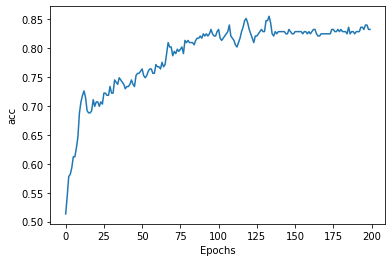

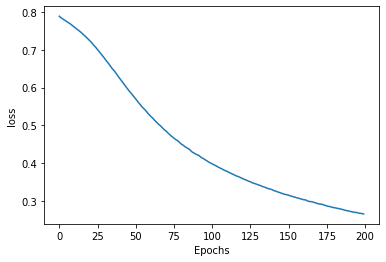

In [166]:
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

In [ ]:
path_serg_test = 'F://test_serg/'
path_nick_test = 'F://test_nick/'
path_roma_test = 'F://test_roma/'
path_noobject_test = 'F://test_noobject/'
